# A/B Testing Analysis for Facebook Ad Bidding Strategy
This notebook demonstrates how to conduct A/B testing on the effectiveness of Facebook Ad bidding strategies. The A/B test compares two bidding strategies (Average Bidding and Maximum Bidding) to determine which one leads to more clicks, purchases, and higher earnings. We will perform data cleaning, visualization, and statistical hypothesis testing.

In [1]:
import pandas as pd
import warnings
import seaborn as sb
import matplotlib.pyplot as plt
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu

warnings.filterwarnings("ignore")

# Load the datasets
control_df = pd.read_csv(r"C:\Users\Annuj\Downloads\archive (8)\ab_test\control_group.csv")
treat_df = pd.read_csv(r"C:\Users\Annuj\Downloads\archive (8)\ab_test\test_group.csv")

# Preview data
print("Control Group:\n", control_df.head(3))
print("\nTreatment Group:\n", treat_df.head(3))

# Check for missing values
print("Control Group:\n ", control_df.isna().sum())
print("\n\nTreatment Group:\n ", treat_df.isna().sum())

# Check for sample sizes
print("Control DF length: ", len(control_df.index), "\nTreatment DF length: ", len(treat_df.index))

Control Group:
    Impression  Click  Purchase  Earning
0       82529   6090       665     2311
1       98050   3383       315     1743
2       82696   4168       458     1798

Treatment Group:
    Impression  Click  Purchase  Earning
0      120104   3217       702     1940
1      134776   3635       834     2929
2      107807   3057       423     2526
Control Group:
  Impression    0
Click         0
Purchase      0
Earning       0
dtype: int64


Treatment Group:
  Impression    0
Click         0
Purchase      0
Earning       0
dtype: int64
Control DF length:  40 
Treatment DF length:  40


## Statistical Summary of the Dataset
Let's take a look at the descriptive statistics to understand the distribution of the data in terms of impressions, clicks, purchases, and earnings.

In [10]:
control_df.describe().T


,count,mean,std,min,25%,50%,75%,max
Impression,40.0,101711.450,20302.122984,45476.0,85726.75,99790.5,115212.5,147539.0
Click,40.0,5100.625,1329.957772,2190.0,4124.25,5001.5,5923.5,7959.0
Purchase,40.0,550.900,134.110517,267.0,470.50,531.5,638.0,802.0
Earning,40.0,1908.575,302.868329,1254.0,1685.75,1975.0,2120.0,2497.0


In [11]:
treat_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Impression,40.0,120512.425,18807.466616,79034.0,112692.25,119291.5,132050.75,158606.0
Click,40.0,3967.550,923.071766,1837.0,3376.50,3931.5,4660.25,6020.0
Purchase,40.0,582.050,161.175164,312.0,444.75,551.0,699.75,890.0
Earning,40.0,2514.925,282.707912,1940.0,2280.25,2544.5,2761.75,3171.0


## Visualizing the Click Distribution
We will use boxplots and histograms to visualize the click distributions between the control and treatment groups.

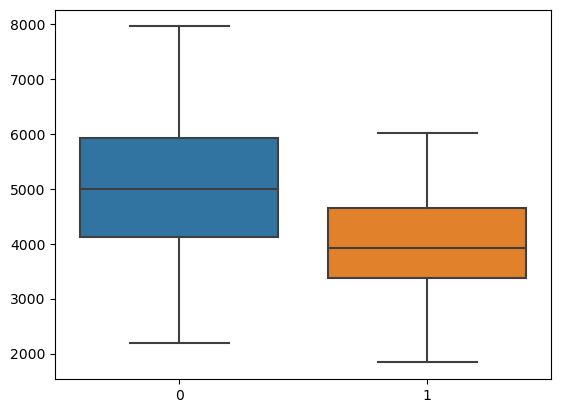

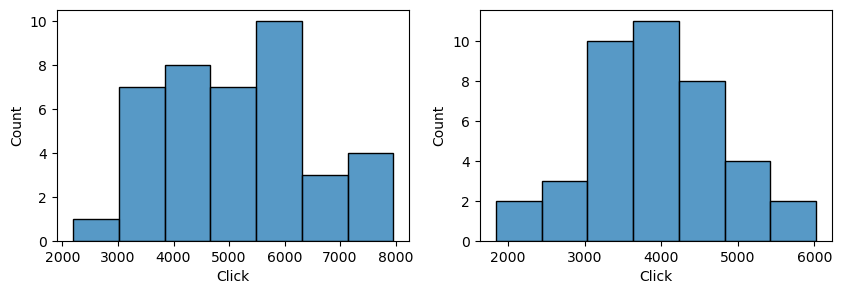

In [3]:
# Boxplot and histogram visualization
sb.boxplot(data=[control_df['Click'], treat_df['Click']])
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
sb.histplot(data=control_df['Click'], ax=axes[0])
sb.histplot(data=treat_df['Click'], ax=axes[1])
plt.show()

## Outlier Detection and Removal
Outliers can affect the results of hypothesis tests, so we'll remove outliers using the Interquartile Range (IQR) method.

In [9]:
# Remove outliers based on IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply outlier removal
control_cleaned = remove_outliers(control_df, 'Click')
treat_cleaned = remove_outliers(treat_df, 'Click')



##  Purchases and Earnings
Finally, we will compare the average purchases and earnings between the control and treatment groups to get a better sense of the overall impact of the bidding strategy.

In [5]:
# Compare average purchases and earnings
avg_purchases_control = control_cleaned['Purchase'].mean()
avg_purchases_treat = treat_cleaned['Purchase'].mean()
print(f'Average Purchases - Control: {avg_purchases_control}, Treatment: {avg_purchases_treat}')

avg_earnings_control = control_cleaned['Earning'].mean()
avg_earnings_treat = treat_cleaned['Earning'].mean()
print(f'Average Earnings - Control: {avg_earnings_control}, Treatment: {avg_earnings_treat}')

Average Purchases - Control: 550.9, Treatment: 582.05
Average Earnings - Control: 1908.575, Treatment: 2514.925


## Hypothesis Testing
We will now test whether the clicks from both groups are normally distributed using the Shapiro-Wilk test. Then, we'll check for variance homogeneity using Levene's test. Finally, we'll use Welch's t-test to compare the means between the groups.

In [6]:
# Shapiro-Wilk test for normality
test_stat, pvalue = shapiro(control_df['Click'])
print("Control Group: test_stat = ", test_stat, " p-value = ", pvalue)
test_stat, pvalue = shapiro(treat_df['Click'])
print("Treatment Group: test_stat = ", test_stat, " p-value = ", pvalue)

Control Group: test_stat =  0.9844093918800354  p-value =  0.8458318114280701
Treatment Group: test_stat =  0.9896464347839355  p-value =  0.9699560403823853


In [7]:
# Levene's test for variance homogeneity
test_stat, pvalue = levene(control_df['Click'], treat_df['Click'])
print("Levene's Test: test_stat = ", test_stat, " p-value = ", pvalue)

Levene's Test: test_stat =  6.307972266621279  p-value =  0.014085731864525894


In [8]:
# Welch's t-test
test_stat, pvalue = ttest_ind(control_df['Click'], treat_df['Click'], equal_var=False)
print('Welch t-test: Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Welch t-test: Test Stat = 4.4266, p-value = 0.0000
